In [7]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')




In [9]:
df =  pd.read_csv("C:\\Users\\HP\\Desktop\\Python Datascience\\House price Dataset\\Bengaluru_House_Data.csv")
#df1 =  pd.read_csv("merged_files.csv")

In [10]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
print("Shape of Datset:", df.shape)

Shape of Datset: (13320, 9)


## Data Cleaning

In [12]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [14]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [15]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [16]:
print("Total Locations available in Data:", len(df.location.unique()))
df.location.unique()

Total Locations available in Data: 1306


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [17]:
len(df.society.unique())

2689

In [18]:
#Dropping Availability and society from the dataset.

df = df.drop(['availability','society','balcony'],axis= 'columns')
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [19]:
(df.isnull().sum() / len(df)) * 100

area_type     0.000000
location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [20]:
#Remove remaining rows with Missing vals

df.dropna(inplace=True)
(df.isnull().sum() / len(df)) * 100

area_type     0.0
location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [21]:
df.shape

(13246, 6)

In [22]:
df['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [23]:
# Deriving Num vals for number of bedrooms

df['size']= df['size'].apply(lambda x: int(x.split(' ')[0]))

In [24]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  int64  
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [26]:
# Lets check total_sqft column as datatype is showing as object

import re

def is_float(s):
    return bool(re.match(r'^[+-]?(\d*\.\d+|\d+\.\d*|\d+)$', str(s)))

# Filter rows where 'Column1' is not a float
df[~df['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,186.000
122,Super built-up Area,Hebbal,4,3067 - 8156,4.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2.0,56.800


In [27]:
#Some of the rows in totals_sqft has range. let us convert it to float.

def convert_1(s):
    token = s.split('-')
    if len(token) == 2:
        return ((float(token[0])+float(token[1]))/2)
    try:
        return float(s)
    except:
        return None

In [28]:
df['total_sqft'] = df['total_sqft'].apply(convert_1)

In [29]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [30]:
df.dropna(inplace=True)
(df.isnull().sum() / len(df)) * 100

area_type     0.0
location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [31]:
#let us check total number of locations in Dataset

len(df['location'].unique())

1298

In [32]:
df['location'].value_counts()

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [33]:
df['location'] =  df['location'].apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [34]:
len(location_stats[location_stats<=10])

1047

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [36]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

df['location'].value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [37]:
#Deriving price per squarefeet column

df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00,4250.000000


## Outlier Treatment

In [38]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,2.800833,1555.302783,2.691136,112.276178,7.920759e+03
std,1.292843,1237.323445,1.338915,149.175995,1.067272e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.267701e+03
50%,3.000000,1275.000000,2.000000,71.850000,5.438331e+03
75%,3.000000,1672.000000,3.000000,120.000000,7.317073e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [39]:
#lET US CHECK IF SQFT/BEDROOM IS LESS THAN CERTAIN THRESHOLD LET US TAKE 300

df[df['total_sqft']/df['bath']<300].head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
9,Plot Area,other,6,1020.0,6.0,370.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9.0,200.0,33333.333333
68,Plot Area,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,Plot Area,other,3,500.0,3.0,100.0,20000.000000
84,Super built-up Area,EPIP Zone,3,1499.0,5.0,102.0,6804.536358


* Here in some rows we could see per bedroom sqft is very less, could be a data error. lets remove these rows



In [40]:
df = df[~(df['total_sqft']/df['bath']<300)]
df.shape

(12563, 7)

In [41]:
numerical_features=[*df._get_numeric_data().columns]     # Selecting all Numerical variables
categorical_columns=[*set(df.columns)-set(numerical_features)]   # Selecting all Categories variables

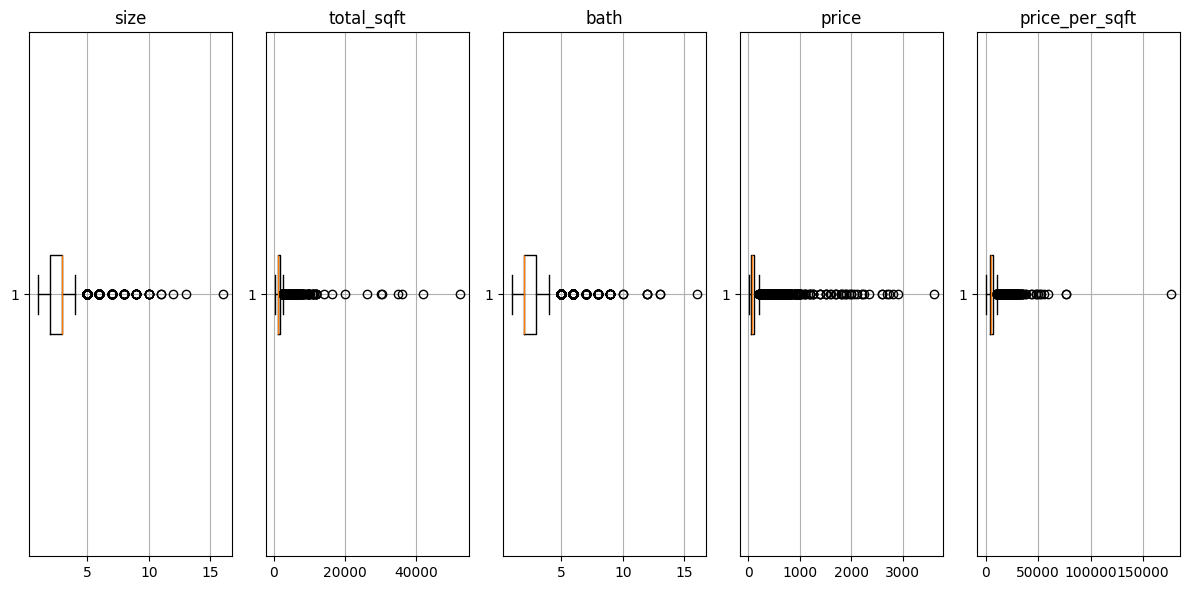

In [42]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Loop through each column and create a boxplot
for i, column in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

* We have Outliers in Size,Bath and Price cols, let us deal with them

### Outlier Removal Using Standard Deviation and Mean

In [43]:
df.price_per_sqft.describe()

count     12563.000000
mean       6335.081938
std        4166.086230
min         267.829813
25%        4213.906002
50%        5300.000000
75%        6956.521739
max      176470.588235
Name: price_per_sqft, dtype: float64

* Min price is given as 267 and max price is 17470, which looks like outliers

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10331, 7)

#### Price



In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)

df.shape

(7354, 7)

In [46]:
df1 = df.drop(['area_type','price_per_sqft'], axis = 'columns')

In [47]:
df1.shape

(7354, 5)

In [48]:
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [49]:
df1.rename(columns={'size': 'BHK'}, inplace=True)


In [50]:
df1.head()

,location,BHK,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [51]:
(df.isnull().sum() / len(df)) * 100

area_type         0.0
location          0.0
size              0.0
total_sqft        0.0
bath              0.0
price             0.0
price_per_sqft    0.0
dtype: float64

In [52]:
#One hot encoding for Lovation

dummies = pd.get_dummies(df1.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df1 = pd.concat([df1,dummies.drop('other',axis='columns')],axis='columns')
df1.head()

,location,BHK,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1630.0,3.0,194.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3,1875.0,2.0,235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3,1200.0,2.0,130.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2,1235.0,2.0,148.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df1 = df1.drop('location',axis='columns')
df1.head()

,BHK,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,130.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,148.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df.isnull().sum()

area_type         0
location          0
size              0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

## Modelling

In [56]:
X = df1.drop(['price'],axis='columns')
y = df1.price
X.head()

,BHK,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)

(5883, 243)
(1471, 243)


In [60]:
scaler = StandardScaler()
lr = LinearRegression()


In [61]:
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [62]:
y_pred_lr = pipeline_lr.predict(X_test)

In [63]:
r2_score(y_test,y_pred_lr)

0.824891239534143

# Lasso


In [64]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

pipeline_lasso.fit(X_train, y_train)

y_pred_lasso = pipeline_lasso.predict(X_test)

r2_score(y_test,y_pred_lasso)


0.795629442795613

In [65]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

pipeline_ridge.fit(X_train, y_train)

y_pred_ridge = pipeline_ridge.predict(X_test)

r2_score(y_test,y_pred_ridge)


0.824911816455365

In [66]:
from xgboost import XGBRegressor
pipeline_XGB = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

pipeline_XGB.fit(X_train, y_train)


y_pred_XGB = pipeline_XGB.predict(X_test)

r2_score(y_test,y_pred_XGB)

0.8541162196130109

* XGboost is the best performing alh=gorithm out of three
* Import picke file

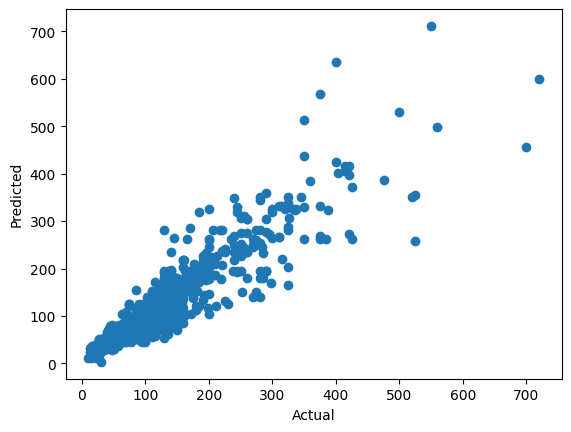

In [67]:
plt.scatter(y_test,y_pred_XGB);
plt.xlabel('Actual');
plt.ylabel('Predicted');

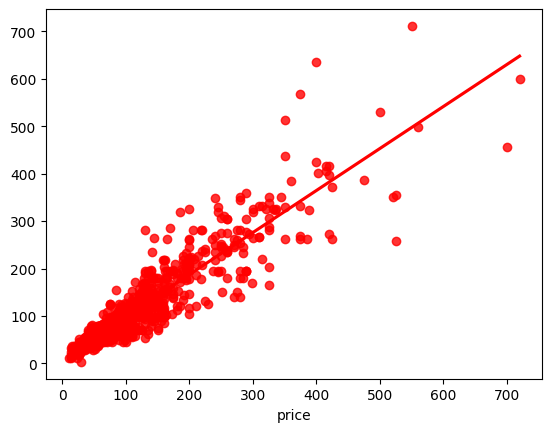

In [68]:
import seaborn as sns

sns.regplot(x=y_test,y=y_pred_XGB,ci=None,color ='red');

In [69]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_XGB,'Difference':y_test-y_pred_XGB})
pred_df

,Actual Value,Predicted Value,Difference
255,50.00,56.211990,-6.211990
4804,75.00,79.004639,-4.004639
2669,100.00,92.088600,7.911400
7818,93.00,99.483711,-6.483711
4774,48.27,56.808365,-8.538365
...,...,...,...
5213,45.90,53.460464,-7.560464
7315,128.00,167.751160,-39.751160
3513,100.00,82.125175,17.874825
5883,56.10,77.981194,-21.881194


In [71]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluate_model(y_test, y_pred_ridge)

(18.13765039656239, 32.996043284593945, 0.824911816455365)

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluate_model(y_test, y_pred_lasso)

(19.876429449784386, 35.64861081594648, 0.795629442795613)

In [74]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluate_model(y_test, y_pred_lr)

(18.139355484264044, 32.997982127702706, 0.824891239534143)

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluate_model(y_test, y_pred_XGB)

(16.690164567667317, 30.11875047888589, 0.8541162196130109)

In [76]:
def predict_price(location,BHK,total_sqft,bath):    
    loc_index = np.where(X.columns==location)[0]

    x = np.zeros(len(X.columns))
    x[0] = BHK
    x[1] = total_sqft
    x[2] = bath
    
    if loc_index >= 0:
        x[loc_index] = 1

    return pipeline_XGB.predict([x])[0]

In [87]:
predict_price('whitefield',1,800,1)

45.959507

In [78]:
import pickle
with open('model3.pickle','wb') as f:
    pickle.dump(pipeline_XGB,f)

In [79]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

FileNotFoundError: [Errno 2] No such file or directory: 'banglore_home_prices_model.pickle'

anyio==3.6.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asgiref==3.5.2
asttokens==2.0.8
attrs==22.1.0
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
colorama==0.4.5
contourpy==1.1.1
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.6
Django==4.1.3
entrypoints==0.4
executing==1.1.1
fastjsonschema==2.16.2
filelock==3.8.0
fonttools==4.42.1
idna==3.4
ipykernel==6.16.0
ipython==8.5.0
ipython-genutils==0.2.0
jedi==0.18.1
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.10
jsonschema==4.16.0
jupyter-core==4.11.1
jupyter-server==1.21.0
jupyter_client==7.4.2
jupyterlab==3.4.8
jupyterlab-pygments==0.2.2
jupyterlab_server==2.16.0
kiwisolver==1.4.5
MarkupSafe==2.1.1
matplotlib==3.8.0
matplotlib-inline==0.1.6
mistune==2.0.4
nbclassic==0.4.5
nbclient==0.7.0
nbconvert==7.2.1
nbformat==5.7.0
nest-asyncio==1.5.6
notebook==6.5.1
notebook-shim==0.1.0
numpy==1.26.0
packaging==21.3
pandas==2.1.1
pandocfilt